也可以将非标量值用于开始和停止，这将返回一个高维数组，代码如下：

In [1]:
import numpy

output = numpy.linspace(start=[2, 5, 9], stop=[100, 130, 160], num=10)
output

array([[  2.        ,   5.        ,   9.        ],
       [ 12.88888889,  18.88888889,  25.77777778],
       [ 23.77777778,  32.77777778,  42.55555556],
       [ 34.66666667,  46.66666667,  59.33333333],
       [ 45.55555556,  60.55555556,  76.11111111],
       [ 56.44444444,  74.44444444,  92.88888889],
       [ 67.33333333,  88.33333333, 109.66666667],
       [ 78.22222222, 102.22222222, 126.44444444],
       [ 89.11111111, 116.11111111, 143.22222222],
       [100.        , 130.        , 160.        ]])

In [2]:
output.shape

(10, 3)

start和stop都是长度相同的列表。每个列表中的第一项（2和100）是第一个向量的起始点和停止点，该向量有10个样本（由num参数确定）。这同样适用于每个列表中的第二个元素和第三个元素。以上代码输出是一个2维NumPy数组，包含10行3列。

通过将可选参数axis设置为1，可以返回该数组的转置版本，代码如下：

In [3]:
output = numpy.linspace(start=[2, 5, 9],
                     stop=[100, 130, 160],
                     num=10,
                     axis=1)
output

array([[  2.        ,  12.88888889,  23.77777778,  34.66666667,
         45.55555556,  56.44444444,  67.33333333,  78.22222222,
         89.11111111, 100.        ],
       [  5.        ,  18.88888889,  32.77777778,  46.66666667,
         60.55555556,  74.44444444,  88.33333333, 102.22222222,
        116.11111111, 130.        ],
       [  9.        ,  25.77777778,  42.55555556,  59.33333333,
         76.11111111,  92.88888889, 109.66666667, 126.44444444,
        143.22222222, 160.        ]])

输出数组现在具有相对于前面的示例交换的行数和列数，在前面的示例中没有显式设置axis参数，并且使用了默认值0。

-----------------

## 叠加行波

一个波可以用下面的函数在数学上表示：
$${W(x,t)=A\sin(\frac{2\pi}{\lambda}(x-vt))}$$

一个波遵循一个正弦函数，它由以下五项定义：
* x：位置
* t：时间
* A：波的振幅
* λ：波长
* v：波的速度

首先，我们为波定义一个类，代码如下：

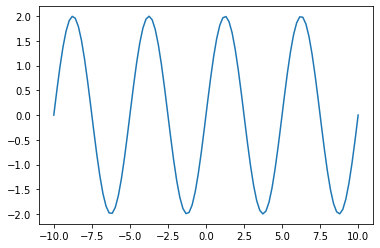

In [4]:
class Wave():
    def __init__(self, amp, wl, v):
        self.__amp = amp
        self.__wl = wl
        self.__v = v

    def get_wave(self, x, t=0):
        wave = self.__amp * numpy.sin((2*numpy.pi/self.__wl)
                                      * (x - self.__v*t))
        return wave
    
    @staticmethod
    def plot_wave(x, ax, wave):
        ax.plot(x, wave)

import matplotlib.pyplot as plt

x = numpy.linspace(-10, 10, 100)
w1 = Wave(2, 5, 2)
fig = plt.figure()
w1.plot_wave(x, plt.gca(), w1.get_wave(x, 0))
plt.show()

现在准备好叠加两个波了，然后把它们加起来。代码如下：


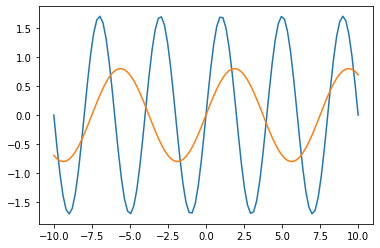

In [5]:
sampling = 100
x_range = -10, 10

amplitudes = [1.7, 0.8]
wavelengths = [4, 7.5]
velocities = [2, 1.5]

x = numpy.linspace(x_range[0], x_range[1], sampling)

w1 = Wave(amplitudes[0], wavelengths[0], velocities[0])
w2 = Wave(amplitudes[1], wavelengths[1], velocities[1])

fig = plt.figure()
w1.plot_wave(x, plt.gca(), w1.get_wave(x, 0))
w2.plot_wave(x, plt.gca(), w2.get_wave(x, 0))
plt.show()

接下来，将两个波叠加起来。代码如下：

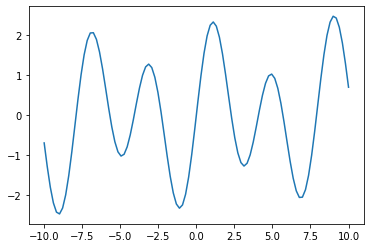

In [6]:
Wave.plot_wave(x, plt.gca(), w2.get_wave(x, 0)+w1.get_wave(x, 0))

上图显示了波浪叠加在一起时的情况。接下来通过绘制不同时间t的叠加波来设置这些波的运动，代码如下：


In [7]:
%matplotlib auto

w1 = Wave(amplitudes[0], wavelengths[0], velocities[0])
w2 = Wave(amplitudes[1], wavelengths[1], velocities[1])

for time in numpy.arange(0, 40, 0.2):
    plt.clf()  # Clear last figure
    Wave.plot_wave(x, plt.gca(), w2.get_wave(x, time)+w1.get_wave(x, time))
    plt.ylim(-3, 3)  # Fix the limits on the y-axis
    plt.pause(0.1)  # Insert short pause to create animation

Using matplotlib backend: Qt5Agg



接下来，我们将做一个程序模拟一个物体围绕固定轴做匀速转动。如果以固定点为源点，则物体转动的轨迹满足以下方程：
$${x^2+y^2=R^2}$$

因此，如果该物体的x位置已经设定，相应的y位置为：
$${y=\pm\sqrt{R^2-x^2}}$$

下面的代码是使用numpy.linspace生成一系列x坐标，然后做图。

In [8]:
sampling = 50
R = 50

x_ = R * numpy.linspace(-1, 1, sampling)
y_ = numpy.sqrt(R ** 2 - x_ ** 2)

现在，我们有了物体运行轨迹的一半（y>=0的部分）。接下来生成下半部分的数据，并与上半部分的数据合并。

In [9]:
x_return = x_[len(x_)-2:0:-1]
y_return = -numpy.sqrt(R ** 2 - x_return ** 2)

x_ = numpy.concatenate((x_, x_return))
y_ = numpy.concatenate((y_, y_return))

x_的值现在是从-50到0，然后又从0回到-50。y_前半部分的为正值，后半部分为负值。x_和y_的散点图将给出物体运动的轨道上。

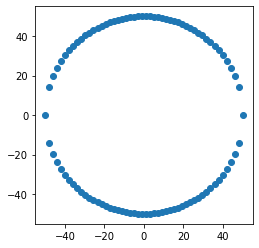

In [10]:
%matplotlib inline
plt.scatter(x_, y_)
plt.axis("square")
plt.show()

散点图显示了物体在轨道上的位置，在轨道的顶部和底部，点靠得更近，但在左右两边是分散的。如果想在轨道圆周上获得均匀分布的点，则需要创建一个非线性的x值数组。当一个点沿着圆形轨道匀速运动时，它在x轴上的投影呈正弦运动，所以可以通过改变x使它与cos(x)成线性关系来修正这个问题，代码如下：

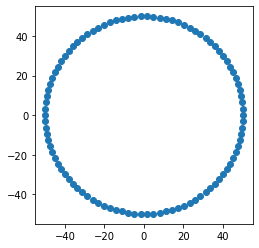

In [11]:
x_ = R * numpy.cos(numpy.linspace(-numpy.pi, 0, sampling))
x_return = x_[len(x_)-2: 0: -1]

y_ = numpy.sqrt(R ** 2 - x_ ** 2)
y_return = -numpy.sqrt(R ** 2 - x_return ** 2)

x_ = numpy.concatenate((x_, x_return))
y_ = numpy.concatenate((y_, y_return))

plt.scatter(x_, y_)
plt.axis("square")
plt.show()

In [12]:
import matplotlib.animation
%matplotlib auto
sampling = 250

# ...

fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_axis_off()

images = []
for x_coord, y_coord in zip(x_, y_):
    img = ax.scatter(x_coord, y_coord, s=250, c="r")
    img2 = ax.scatter(0, 0, s=1000, c="y")
    images.append([img, img2])

animation = matplotlib.animation.ArtistAnimation(fig,
                                                 images,
                                                 interval=2.5,
                                                 blit=True
                                                 )
plt.show()

Using matplotlib backend: Qt5Agg
